# Early Stage Detection, Classification and Prediction of Alzheimer Disease

In [1]:
#Necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
# from sklearn.metrics import mean_squared_error
from sklearn import model_selection
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
# ALZHEIMER_FEATURES_FILE_NAME = "alzheimer.csv"

In [3]:
import pandas as pd

data=pd.read_csv("alzheimer.csv")



In [4]:
data.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [5]:
data.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


## Dataset Information
##### Group: Whether demented, non demented or converted(growing from non-demented to demented)
##### M/F: Gender of patient
##### Age: Age of Patient
##### EDUC: Education Level
##### SES: Socio Economic Status
##### MMSE: Mini Mental State Examination
##### CDR: Clinical Dementia Rating
##### eTIV: estimated InterCranial Volume
##### nWBV: normalize Whole brain volume
##### ASF: Atlas scaling factor

In [6]:
print(data.shape)

(373, 10)


In [7]:
print(data.columns)

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None


In [9]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [10]:
print(data.describe().T)

      count         mean         std       min       25%       50%       75%  \
Age   373.0    77.013405    7.640957    60.000    71.000    77.000    82.000   
EDUC  373.0    14.597855    2.876339     6.000    12.000    15.000    16.000   
SES   354.0     2.460452    1.134005     1.000     2.000     2.000     3.000   
MMSE  371.0    27.342318    3.683244     4.000    27.000    29.000    30.000   
CDR   373.0     0.290885    0.374557     0.000     0.000     0.000     0.500   
eTIV  373.0  1488.128686  176.139286  1106.000  1357.000  1470.000  1597.000   
nWBV  373.0     0.729568    0.037135     0.644     0.700     0.729     0.756   
ASF   373.0     1.195461    0.138092     0.876     1.099     1.194     1.293   

           max  
Age     98.000  
EDUC    23.000  
SES      5.000  
MMSE    30.000  
CDR      2.000  
eTIV  2004.000  
nWBV     0.837  
ASF      1.587  


In [11]:
print(data["M/F"].value_counts())

F    213
M    160
Name: M/F, dtype: int64


In [12]:
print(data.corr())

           Age      EDUC       SES      MMSE       CDR      eTIV      nWBV  \
Age   1.000000 -0.027886 -0.046857  0.055612 -0.026257  0.042348 -0.518359   
EDUC -0.027886  1.000000 -0.722647  0.194884 -0.153121  0.257015 -0.012200   
SES  -0.046857 -0.722647  1.000000 -0.149219  0.076160 -0.261575  0.090095   
MMSE  0.055612  0.194884 -0.149219  1.000000 -0.686519 -0.032084  0.341912   
CDR  -0.026257 -0.153121  0.076160 -0.686519  1.000000  0.022819 -0.344819   
eTIV  0.042348  0.257015 -0.261575 -0.032084  0.022819  1.000000 -0.210122   
nWBV -0.518359 -0.012200  0.090095  0.341912 -0.344819 -0.210122  1.000000   
ASF  -0.035067 -0.241752  0.255576  0.040052 -0.029340 -0.988877  0.213476   

           ASF  
Age  -0.035067  
EDUC -0.241752  
SES   0.255576  
MMSE  0.040052  
CDR  -0.029340  
eTIV -0.988877  
nWBV  0.213476  
ASF   1.000000  


C:\Users\titik\AppData\Local\Temp\ipykernel_14980\3359323643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


In [13]:
print(data.isnull().sum())

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [14]:
data.dropna(inplace=True)

In [15]:
data.shape

(354, 10)

### Visualizations

**Histograms**

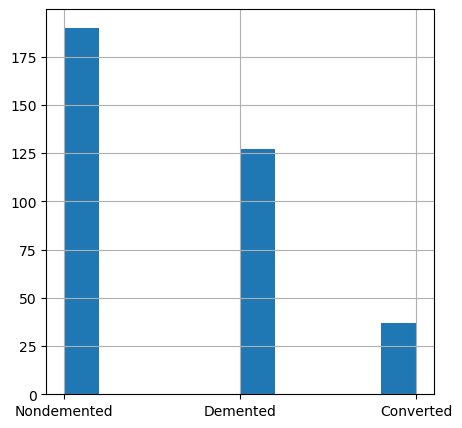

In [16]:
ax=data["Group"].hist(figsize=(5,5))
plt.show()

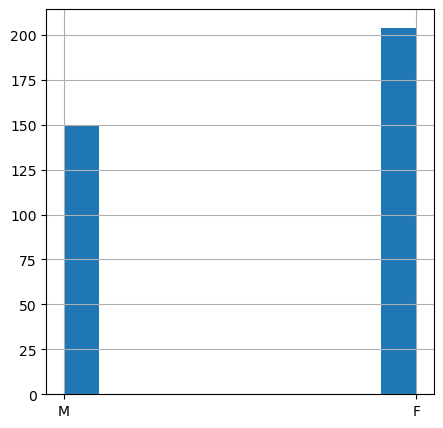

In [17]:
# For gender
data["M/F"].hist(figsize=(5,5))
plt.show()

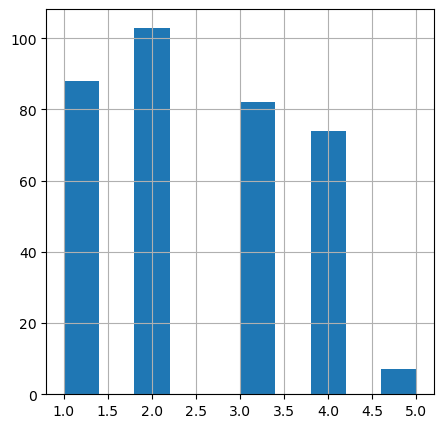

In [18]:
data["SES"].hist(figsize=(5,5))
plt.show()

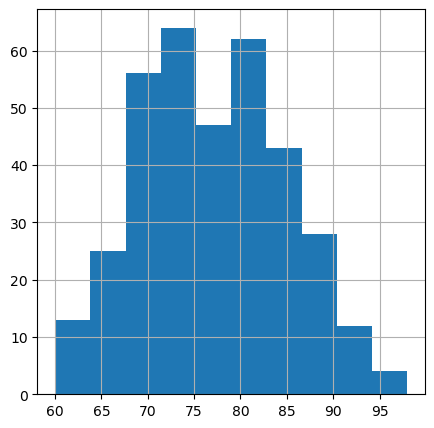

In [19]:
# For Age
data["Age"].hist(figsize=(5,5))
plt.show()

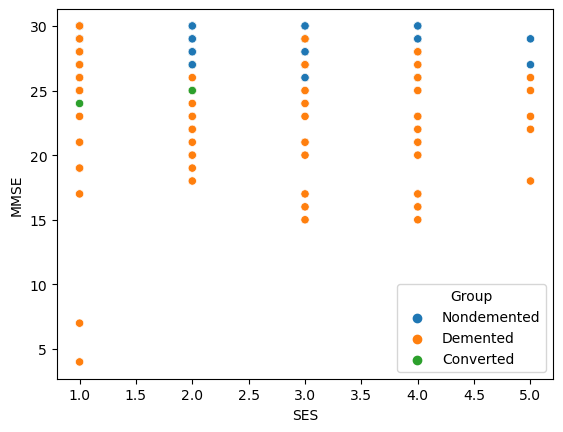

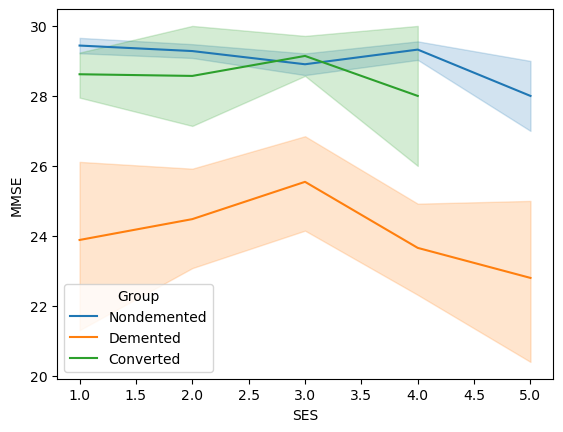

In [20]:
# scatter plot
sns.scatterplot(x="SES",y="MMSE",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES", y="MMSE",hue="Group", data=data)
plt.show()

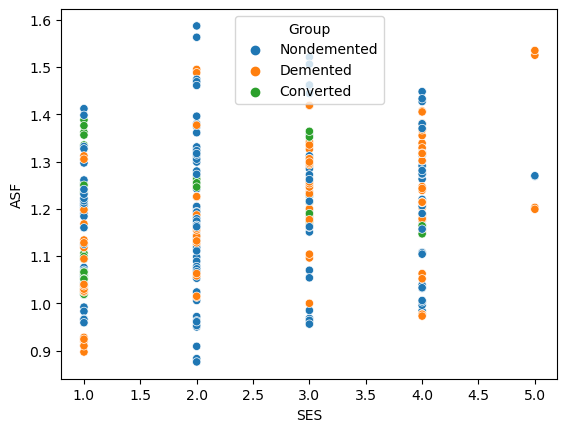

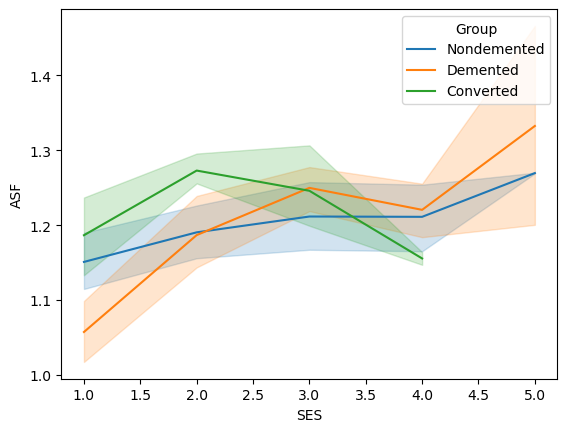

In [21]:
sns.scatterplot(x="SES",y="ASF",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES", y="ASF",hue="Group", data=data)
plt.show()

In [22]:
Features = ["MMSE","eTIV","nWBV","ASF"]

### Correlation

In [23]:
corrPearson = data[Features].corr(method="pearson")

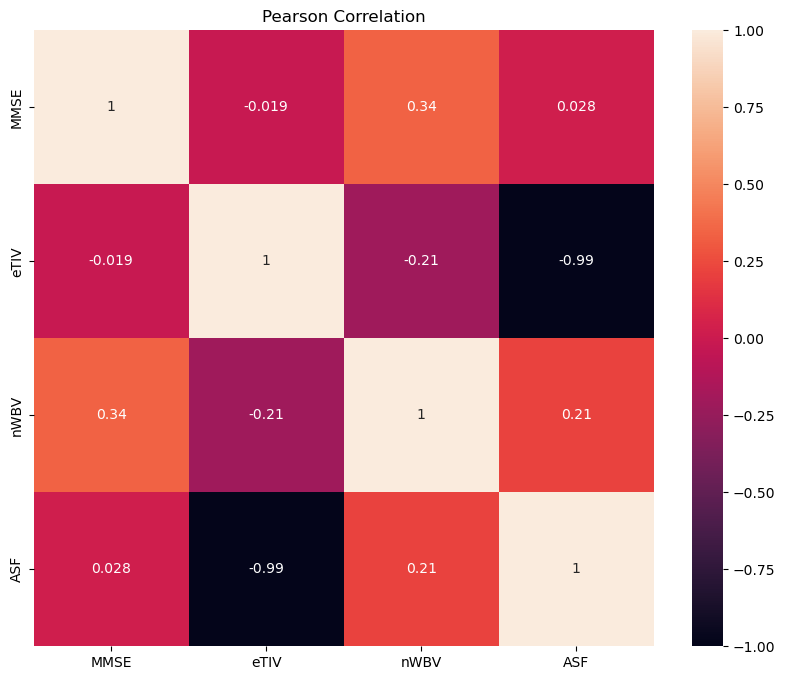

In [24]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True, vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

In [25]:
data.columns = ['Group', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [26]:
#categorical to numerical
Columns = ["Group","Gender"]
encode = LabelEncoder()
for i in Columns:
    print(data[i].value_counts())
    print("----")
    data[i] = encode.fit_transform(data[i])
    print(data[i].value_counts())

Nondemented    190
Demented       127
Converted       37
Name: Group, dtype: int64
----
2    190
1    127
0     37
Name: Group, dtype: int64
F    204
M    150
Name: Gender, dtype: int64
----
0    204
1    150
Name: Gender, dtype: int64


In [27]:
data.Gender = data.Gender.replace("M", 0)
data.Gender = data.Gender.replace("F", 1)
data.Group = data.Group.replace("Converted", 0)
data.Group = data.Group.replace("Demented", 1)
data.Group = data.Group.replace("Nondemented", 2)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   354 non-null    int32  
 1   Gender  354 non-null    int32  
 2   Age     354 non-null    int64  
 3   EDUC    354 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    354 non-null    float64
 6   CDR     354 non-null    float64
 7   eTIV    354 non-null    int64  
 8   nWBV    354 non-null    float64
 9   ASF     354 non-null    float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 27.7 KB
None


In [28]:
#replacing null values
data["SES"].fillna(data["SES"].mean(), inplace=True)
data["MMSE"].fillna(data["MMSE"].mean(), inplace=True)
print(data.isnull().sum())

Group     0
Gender    0
Age       0
EDUC      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


### Train_test

In [29]:
#splitting data into dependant and independant grps
x = data.drop("Group",axis=1)
y = data["Group"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.20,random_state=42)

## DECISION TREE
###### Decision trees are a type of machine-learning algorithm that can be used for both classification and regression tasks.
###### They are represented as tree structures, where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a prediction.
###### The algorithm works by recursively splitting the data into smaller and smaller subsets based on the feature values.
###### At each node, the algorithm chooses the feature that best splits the data into groups with different target values.

### Why decision tree rather than any other:
##### Unlike most Machine Learning algorithms, it works effectively with non-linear data. And since our dataset it from medical background, the data here are complex.

In [30]:
data

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,2,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,2,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [31]:
import warnings
warnings.filterwarnings('ignore')
#DECISION TREE
#Before Tuning
print("Results from Decision Tree Classifier before tuning")
Deci_Tree = DecisionTreeClassifier().fit(xTrain,yTrain)
predict = Deci_Tree.predict(xTest)

#accuracy score
print("Accuracy Score: ", accuracy_score(yTest,predict))

#cross validation
CV = cross_val_score(Deci_Tree,xTest,yTest,cv=10).mean()
print("Cross Validation score : ",CV);

print("==============Results from Decision Tree Classifier after tuning==============")
Deci_Tree_Tuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(xTrain,yTrain)
predict_tuned = Deci_Tree_Tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest,predict_tuned))
CVtuned = cross_val_score(Deci_Tree_Tuned,xTest,yTest,cv=10).mean()
print("Cross Validaition Score: ",CVtuned)

Results from Decision Tree Classifier before tuning
Accuracy Score:  0.8732394366197183
Cross Validation score :  0.8285714285714285
==============Results from Decision Tree Classifier after tuning==============
Accuracy Score:  0.8732394366197183
Cross Validaition Score:  0.8732142857142856


## XGBoost Algorithms
###### XGBoost is a robust machine-learning algorithm that can help you understand your data and make better decisions.

In [32]:
#XGBoost
#Before tuning
print("Results from XGB Classifier before tuning")
xgbc = XGBClassifier(verbose=False).fit(xTrain, yTrain)
predict = xgbc.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict))
CV = cross_val_score(xgbc, xTest, yTest, cv=10).mean()
print("Cross Validation Score: ", CV)

print("==============Results from XGB Classifier after tuning==============")
xgbc_tuned = XGBClassifier( max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8).fit(xTrain, yTrain)
predict_tuned = xgbc_tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict_tuned))
CVtuned = cross_val_score(xgbc_tuned,xTest,yTest,cv=10).mean()
print("Cross Validation Score: ", CVtuned)

Results from XGB Classifier before tuning
Accuracy Score:  0.8873239436619719
Cross Validation Score:  0.8464285714285713
==============Results from XGB Classifier after tuning==============
Accuracy Score:  0.8873239436619719
Cross Validation Score:  0.8464285714285713


----------------------------
DecisionTreeClassifier: 
Accuracy: 0.8732394366197183
----------------------------
XGBClassifier: 
Accuracy: 0.8873239436619719


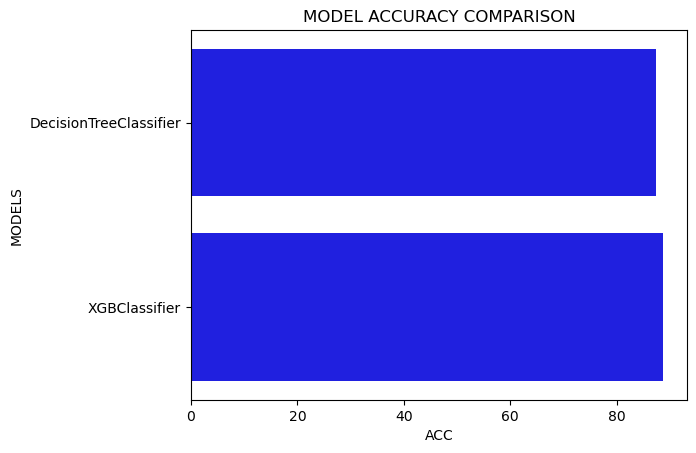

In [33]:
models = [Deci_Tree_Tuned,xgbc]
r = pd.DataFrame(columns=["MODELS","ACC"])

for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = accuracy_score(yTest, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)

sns.barplot(x="ACC",y="MODELS",data=r,color="b")
plt.xlabel("ACC")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

### Most accurate is XGBclassifier

In [37]:
user_input={
    'Gender': int(input("Enter Gender:")),
    'Age':int(input("Enter Age:")),
    'EDUC':int(input("Enter EDUC:")),
    'SES':float(input("Enter SES:")),
    'MMSE':float(input("Enter MMSE:")),
    'CDR':float(input("Enter CDR:")),
    'eTIV':int(input("Enter eTIV:")),
    'nWBV':float(input("Enter nWBV:")),
    'ASF':float(input("Enter ASF:"))
}
#create a dataframe from user input
user_data=pd.DataFrame([user_input])
x = data.drop("Group",axis=1)
y = data["Group"]
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.20,random_state=42)
model = XGBClassifier(verbose=False)
model.fit(xTrain, yTrain)
predict = model.predict(user_data)
print(predict)
#if you also want to predict the probability you can use predict_proba

if predict==[2]:
    print("Alzheimer's not detected")
else:
    print("Alzheimer's detected")
#     print('\n')
#     user_prob=model.predict_proba(user_data)
#     print('\n')
#     print(f'probability percentage of AD : {user_prob[0][1] *100:.2f}%')

#0	67	16	3.000000	25.0	0.1	1787	0.926	0.873....output[2] non demented
#1	87	14	2.000000	27.0	0.0	1987	0.696	0.883....output[2] non demented
#1	75	12	2.460452	23.0	0.5	1678	0.736	1.046....output[1] demented
#0	92	14	1	27	0.5	1423	0.696	1.234...output[0]...converted

#working for all the cases above

Enter Gender:1
Enter Age:87
Enter EDUC:14
Enter SES:2.0
Enter MMSE:27.0
Enter CDR:0.0
Enter eTIV:1987
Enter nWBV:0.696
Enter ASF:0.883
[2]
Alzheimer's not detected
